# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
from sklearn.decomposition import PCA

# Importing Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# No Missing Values

In [4]:
df.isna().any().any()

False

# Encoding Categorical Values

In [5]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [6]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

# Spliting into Train and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Sample Row

In [8]:
X_train.iloc[0].to_dict()

{'Age': 44,
 'BusinessTravel': 0,
 'DailyRate': 489,
 'Department': 1,
 'DistanceFromHome': 23,
 'Education': 3,
 'EducationField': 3,
 'EnvironmentSatisfaction': 2,
 'Gender': 1,
 'HourlyRate': 67,
 'JobInvolvement': 3,
 'JobLevel': 2,
 'JobRole': 2,
 'JobSatisfaction': 2,
 'MaritalStatus': 1,
 'MonthlyIncome': 2042,
 'MonthlyRate': 25043,
 'NumCompaniesWorked': 4,
 'OverTime': 0,
 'PercentSalaryHike': 12,
 'PerformanceRating': 3,
 'RelationshipSatisfaction': 3,
 'StockOptionLevel': 1,
 'TotalWorkingYears': 17,
 'TrainingTimesLastYear': 3,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 3,
 'YearsInCurrentRole': 2,
 'YearsSinceLastPromotion': 1,
 'YearsWithCurrManager': 2}

# Feature Scaling

PCA

20 PCs explain  [70.04405459 99.77480823] % of variance cumulatively


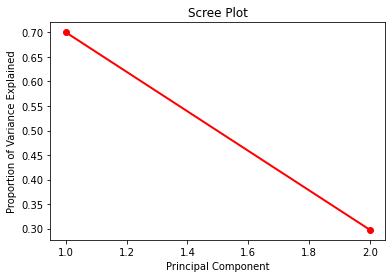

In [9]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [15.58508852 22.10185905 28.04334119 33.65294907 39.14381204 43.25621195
 47.17898697 50.93253374 54.58229749 58.17238639 61.66234142 65.03911255
 68.31094955 71.51018146 74.62021795 77.69564464 80.6452611  83.57698594
 86.38126996 89.11972829] % of variance cumulatively


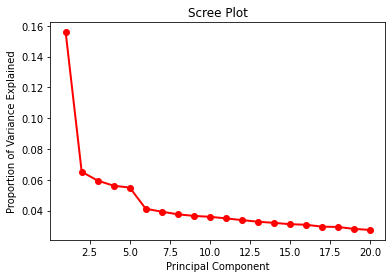

In [10]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [ 9.94042236 18.70779984 26.52210929 33.42983921 40.18680987 45.55749825
 50.80834725 55.69657105 60.54457026 64.80129324 68.59815395 72.08063773
 75.29860899 78.30479319 81.23342626 83.85018564 86.23691012] % of variance cumulatively


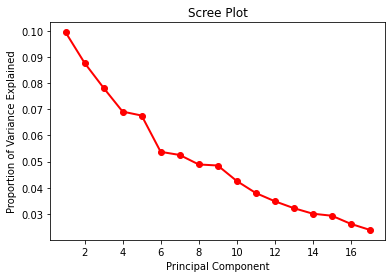

In [11]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [12]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyper-parameter Tuning Using Grid Search CV

In [13]:
def tune_hyperparameters(model,X,y):
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)

### With Standardization

In [14]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_standardized,y_train)

Best Params:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### With Normalization

In [15]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_normalized,y_train)

Best Params:  {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


# Performing Logistic Regression

In [19]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred,zero_division=0))
  print("Recall: ",recall_score(y_test,y_pred,zero_division=0))
  print("F1 Score: ",f1_score(y_test,y_pred,zero_division=0))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without scaling

Accuracy:  0.8253968253968254
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
Confusion Matrix:
 [[364   0]
 [ 77   0]]


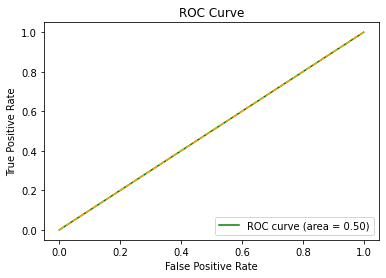

In [20]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.8480725623582767
Precision:  0.6666666666666666
Recall:  0.2597402597402597
F1 Score:  0.3738317757009345
Confusion Matrix:
 [[354  10]
 [ 57  20]]


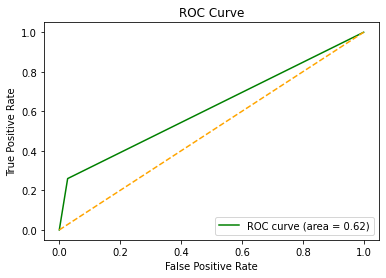

In [33]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=0.001,penalty='l2',solver='liblinear'),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.8526077097505669
Precision:  0.7727272727272727
Recall:  0.22077922077922077
F1 Score:  0.3434343434343434
Confusion Matrix:
 [[359   5]
 [ 60  17]]


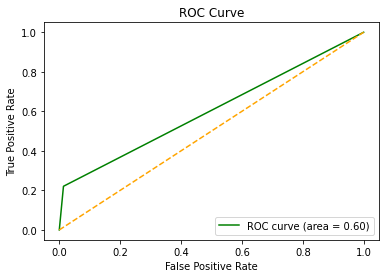

In [34]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=100,penalty='l1',solver='liblinear'),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [35]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [36]:
metrics = []

### Without Scaling

In [37]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000),X,y))

Accuracy:  0.8387755102040817
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

### With Standardization

In [38]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=0.001,penalty='l2',solver='liblinear'),X_standardized,y))

Accuracy:  0.864625850340136
Precision:  0.6963752913752913
Recall:  0.2955673758865248
F1 Score:  0.4121493182471422


### With Normalization

In [39]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=100,penalty='l1',solver='liblinear'),X_normalized,y))

Accuracy:  0.8605442176870748
Precision:  0.7133333333333334
Recall:  0.24069148936170212
F1 Score:  0.35648169585100165


# Performance and Comparison Plots

In [40]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.838776,0.000000,0.000000,0.000000
With Standardization,0.864626,0.696375,0.295567,0.412149
With Normalization,0.860544,0.713333,0.240691,0.356482


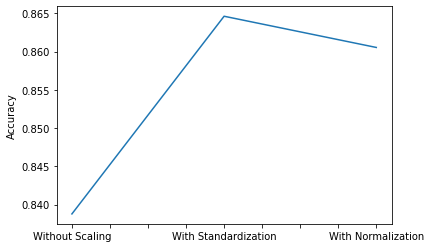

In [41]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

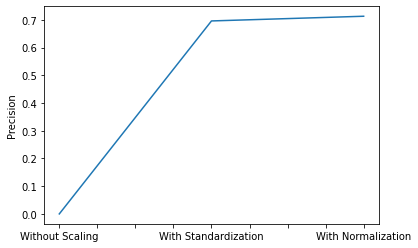

In [42]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

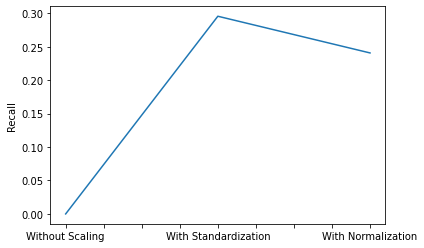

In [43]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

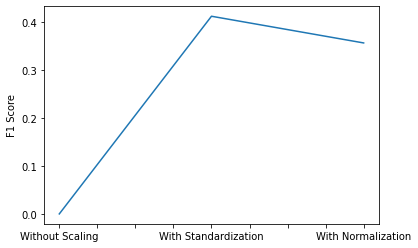

In [44]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()